In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as smt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10

In [2]:
dir(smt)

['AR',
 'ARIMA',
 'ARMA',
 'ArmaProcess',
 'DynamicFactor',
 'DynamicVAR',
 'ExponentialSmoothing',
 'Holt',
 'MarkovAutoregression',
 'MarkovRegression',
 'SARIMAX',
 'SVAR',
 'SimpleExpSmoothing',
 'UnobservedComponents',
 'VAR',
 'VARMAX',
 'VECM',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acf',
 'acovf',
 'add_lag',
 'add_trend',
 'adfuller',
 'arma_generate_sample',
 'arma_order_select_ic',
 'bds',
 'ccf',
 'ccovf',
 'coint',
 'datetools',
 'detrend',
 'filters',
 'graphics',
 'interp',
 'kpss',
 'lagmat',
 'lagmat2ds',
 'pacf',
 'pacf_ols',
 'pacf_yw',
 'periodogram',
 'q_stat',
 'seasonal_decompose',
 'statespace',
 'stattools',
 'tsatools',
 'var',
 'x13_arima_analysis',
 'x13_arima_select_order']

In [3]:
data= pd.read_csv("AirPassengers.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


To read the .csv file as Time series file there are 2 methods.
Method 1: While importing data set passs certain commands to it.

Let’s understand the arguments one by one:

parse_dates: This specifies the column which contains the date-time information. As we say above, the column name is ‘Month’.

index_col: A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. So this argument tells pandas to use the ‘Month’ column as index.

date_parser: This specifies a function which converts an input string into datetime variable. By default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. Something similar to the dataparse function defined here can be used for this purpose.

In [11]:
data1 = pd.read_csv("AirPassengers.csv", parse_dates=['Month'],index_col='Month',date_parser= lambda dates: pd.datetime.strptime(dates,'%Y-%m'))
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [12]:
data1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Smoothening the series using moving average

Calculating 6-month and 12-month rolling mean

In [13]:
data1['6-month-SMA']=data1['#Passengers'].rolling(window=6).mean()
data1['12-month-SMA']=data1['#Passengers'].rolling(window=12).mean()
data1.head(15)

,#Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


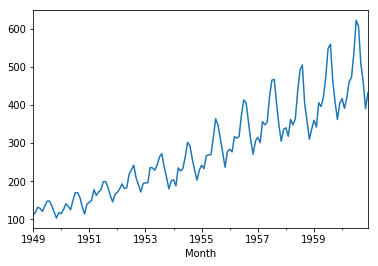

In [16]:
data1['#Passengers'].plot()

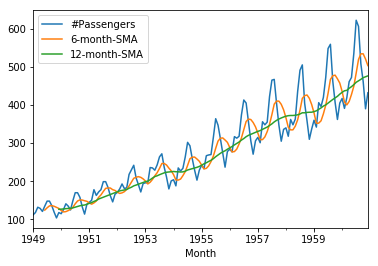

In [17]:
data1.plot()

In [18]:
len(data1)

144

Plot various moving averages and plot them in a graph to see the trend and seasonality

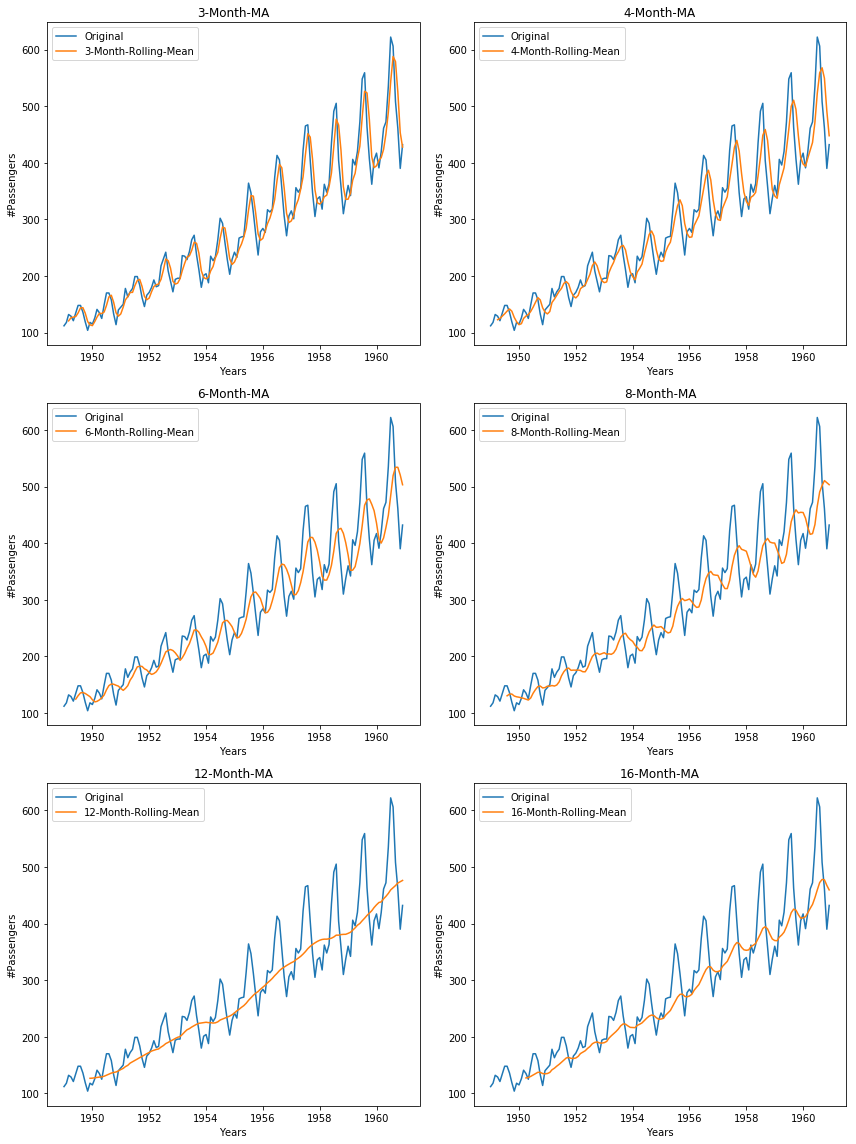

In [21]:
fig,axes = plt.subplots(3,2,sharey=False,sharex=False)
fig.set_figwidth(12)
fig.set_figheight(16)

axes[0][0].plot(data1.index,data1['#Passengers'],label='Original')
axes[0][0].plot(data1.index,data1['#Passengers'].rolling(window=3).mean(),label= '3-Month-Rolling-Mean')
axes[0][0].set_xlabel('Years')
axes[0][0].set_ylabel('#Passengers')
axes[0][0].set_title('3-Month-MA')
axes[0][0].legend(loc='best')

axes[0][1].plot(data1.index,data1['#Passengers'],label='Original')
axes[0][1].plot(data1.index,data1['#Passengers'].rolling(window=4).mean(),label= '4-Month-Rolling-Mean')
axes[0][1].set_xlabel('Years')
axes[0][1].set_ylabel('#Passengers')
axes[0][1].set_title('4-Month-MA')
axes[0][1].legend(loc='best')

axes[1][0].plot(data1.index,data1['#Passengers'],label='Original')
axes[1][0].plot(data1.index,data1['#Passengers'].rolling(window=6).mean(),label= '6-Month-Rolling-Mean')
axes[1][0].set_xlabel('Years')
axes[1][0].set_ylabel('#Passengers')
axes[1][0].set_title('6-Month-MA')
axes[1][0].legend(loc='best')

axes[1][1].plot(data1.index,data1['#Passengers'],label='Original')
axes[1][1].plot(data1.index,data1['#Passengers'].rolling(window=8).mean(),label= '8-Month-Rolling-Mean')
axes[1][1].set_xlabel('Years')
axes[1][1].set_ylabel('#Passengers')
axes[1][1].set_title('8-Month-MA')
axes[1][1].legend(loc='best')

axes[2][0].plot(data1.index,data1['#Passengers'],label='Original')
axes[2][0].plot(data1.index,data1['#Passengers'].rolling(window=12).mean(),label= '12-Month-Rolling-Mean')
axes[2][0].set_xlabel('Years')
axes[2][0].set_ylabel('#Passengers')
axes[2][0].set_title('12-Month-MA')
axes[2][0].legend(loc='best')

axes[2][1].plot(data1.index,data1['#Passengers'],label='Original')
axes[2][1].plot(data1.index,data1['#Passengers'].rolling(window=16).mean(),label= '16-Month-Rolling-Mean')
axes[2][1].set_xlabel('Years')
axes[2][1].set_ylabel('#Passengers')
axes[2][1].set_title('16-Month-MA')
axes[2][1].legend(loc='best')

plt.tight_layout()
plt.show()

Exponential Weighted Moving Average

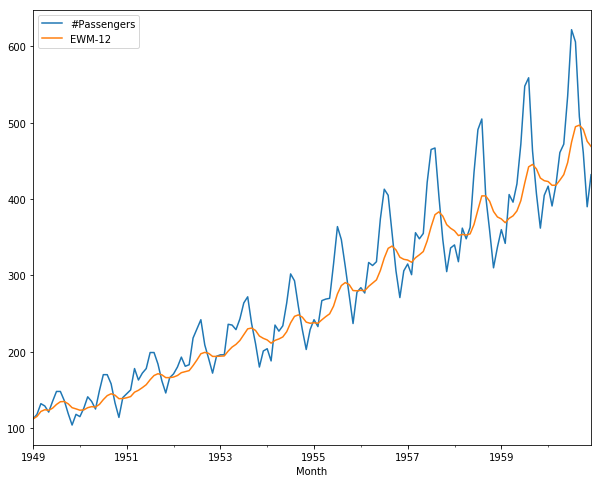

In [23]:
data1['EWM-12']=data1['#Passengers'].ewm(span=12).mean()
data1[['#Passengers','EWM-12']].plot(figsize=(10,8))

Seasonal Decomposition

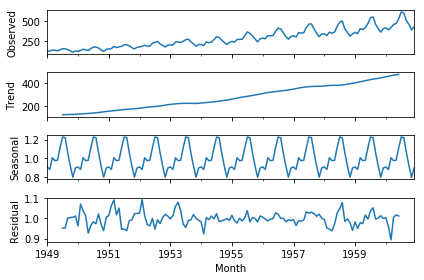

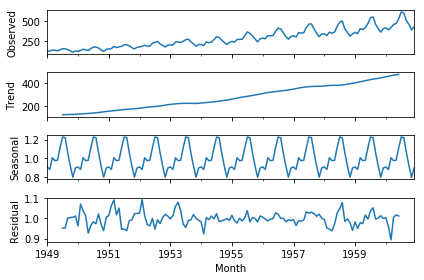

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
#dir(seasonal_decompose)
result= seasonal_decompose(data1['#Passengers'], model='multiplicative')
result.plot()

In [31]:
decomposition_output= pd.DataFrame(pd.concat([pd.DataFrame(result.observed),pd.DataFrame(result.trend)
                                             ,pd.DataFrame(result.seasonal),pd.DataFrame(result.resid)],axis=1))
decomposition_output.columns=list(['Actual','Trend','Seasonal','Resid'])
decomposition_output.head(10)

,Actual,Trend,Seasonal,Resid
Month,,,,
1949-01-01,112,NaN,0.910230,NaN
1949-02-01,118,NaN,0.883625,NaN
1949-03-01,132,NaN,1.007366,NaN
1949-04-01,129,NaN,0.975906,NaN
1949-05-01,121,NaN,0.981378,NaN
1949-06-01,135,NaN,1.112776,NaN
1949-07-01,148,126.791667,1.226556,0.951664
1949-08-01,148,127.250000,1.219911,0.953401
1949-09-01,136,127.958333,1.060492,1.002220


In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    """
    Pass in a time series, returns ADF report
    """
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

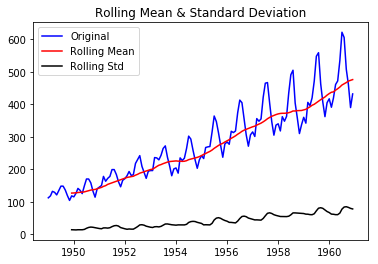

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [33]:
test_stationarity(data1['#Passengers'])

In [34]:
adfuller(data1['#Passengers'],autolag='AIC')

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [1]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [36]:
adf_check(data1['#Passengers'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.8153688792060423
p-value : 0.9918802434376409
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Eliminating Trend

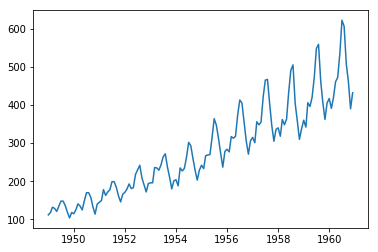

In [37]:
plt.plot(data1['#Passengers'])

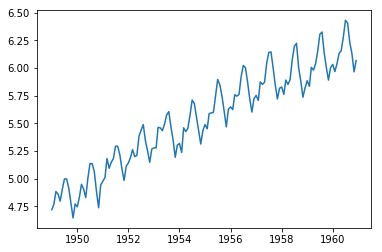

In [38]:
data_log=np.log(data1['#Passengers'])
plt.plot(data_log)

In [39]:
adf_check(data_log)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.7170170891069714
p-value : 0.4223667747703857
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


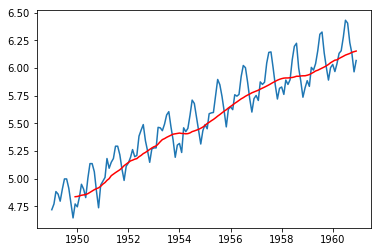

In [40]:
moving_average=data_log.rolling(window=12).mean()
plt.plot(data_log)
plt.plot(moving_average,color='red')

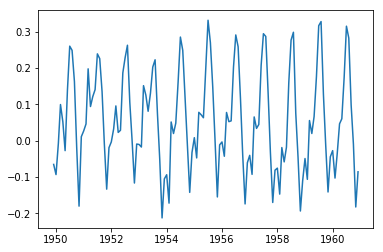

In [41]:
ma_diff= data_log - moving_average
plt.plot(ma_diff)

In [42]:
ma_diff.dropna(inplace=True)
adf_check(ma_diff)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.162907991300858
p-value : 0.022234630001243844
#Lags Used : 13
Number of Observations Used : 119
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


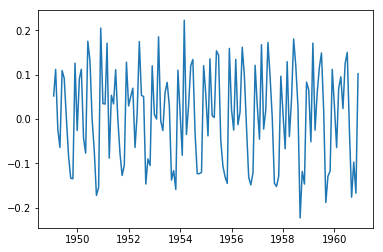

In [43]:
season_diff=data_log-data_log.shift()
plt.plot(season_diff)

In [44]:
season_diff.dropna(inplace=True)
adf_check(season_diff)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.717130598388145
p-value : 0.0711205481508568
#Lags Used : 14
Number of Observations Used : 128
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## ETS model

#### Simple exponential smoothing 

In [46]:
alpha = 0.8
pred_1 = np.sum([x*alpha*np.power((1-alpha),i) for (i,x) in enumerate(data1['#Passengers'])])
print(pred_1)

alpha = 0.6
pred_2 = np.sum([x*alpha*np.power((1-alpha),i) for (i,x) in enumerate(data1['#Passengers'])])
print(pred_2)

alpha = 0.2
pred_3 = np.sum([x*alpha*np.power((1-alpha),i) for (i,x) in enumerate(data1['#Passengers'])])
print(pred_3)

113.72847132567541
116.42655989888127
125.49457794458833


Holt-Winters Seasonal model

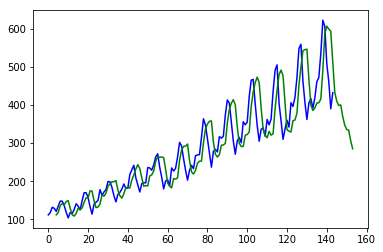

In [50]:
def holtwinters(series, alpha = 0.3, beta = 0.3, gamma = 0.3, seasonality = 4, type = "multiplicative", pred_steps = 10):
    
    # Initialisation
    level = [None]*len(series)
    trend = [None]*len(series)
    seasonal = [None]*len(series)
    forecast = [None]*(len(series) + pred_steps)
    
    for i in range(4):
        seasonal[i] = ( series[i]/np.mean(series[i:seasonality]) )
        
    level[seasonality-1] = np.mean(series[:seasonality])
    trend[seasonality-1] = 0
    
    # Holt-winters multiplicative steps
    for i in range(seasonality, len(series)):
        level[i] = alpha*(series[i]/seasonal[i-seasonality]) + (1-alpha)*(level[i-1] + trend[i-1])
        trend[i] = beta*(level[i] - level[i-1]) + (1-beta)*trend[i-1]
        seasonal[i] = gamma*(series[i]/(level[i-1] + trend[i-1])) + (1-gamma)*seasonal[i-seasonality]
        
        forecast[i] = (level[i-1] + trend[i-1])*seasonal[i-seasonality]
    
    # Make predictions
    last_index = len(series)-1
    for i in range(1,pred_steps+1):
        forecast[last_index+i] = (level[last_index] + i*trend[last_index])*seasonal[last_index-seasonality+((i-1)%seasonality)+1]
    
    return forecast


forecast = holtwinters(data1['#Passengers'], alpha = 0.3, beta = 0.3, gamma = 0.3, seasonality = 4)

plt.plot(np.arange(144), data1['#Passengers'], 'b-', np.arange(154), forecast, 'g-')
plt.show()

TIME SERIES MODELLING

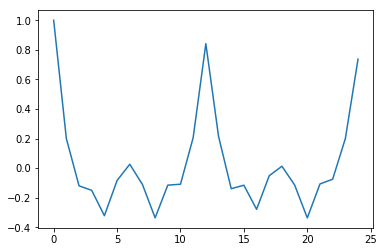

In [52]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf  = acf(season_diff, nlags=24)
lag_pacf = pacf(season_diff, nlags=24, method='ols')
plt.plot(lag_acf)

Text(0.5, 1.0, 'Autocorrelation Function')

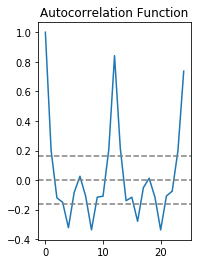

In [53]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(season_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(season_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

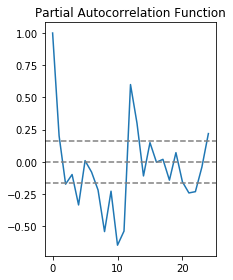

In [54]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(season_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(season_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

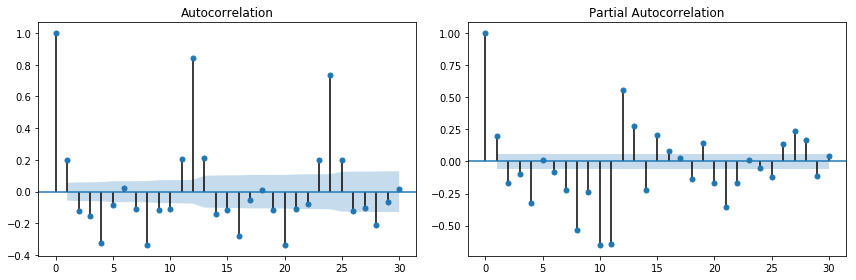

In [55]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(season_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(season_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

## ARIMA models

In [57]:
from statsmodels.tsa.arima_model import ARIMA
m1=ARIMA(data_log, order=(1,1,1))
results1=m1.fit()
print(results1.summary())

/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 124.804
Method:                       css-mle   S.D. of innovations              0.101
Date:                Thu, 09 Jan 2020   AIC                           -241.608
Time:                        19:43:58   BIC                           -229.756
Sample:                    02-01-1949   HQIC                          -236.792
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0098      0.010      0.993      0.322      -0.010       0.029
ar.L1.D.#Passengers    -0.5826      0.128     -4.536      0.000      -0.834      -0.331
ma.L1.D.#Passeng

/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was pro

Text(0.5, 1.0, 'RSS: nan')

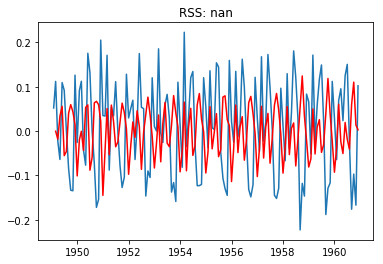

In [59]:
model1 = ARIMA(data_log, order=(2, 2, 0))  #RSS=1.5 #AR Model
model2 = ARIMA(data_log, order=(0, 2, 2))  #RSS=1.4 #MA Model
model = ARIMA(data_log, order=(2, 2, 1))  #RSS=1 #ARMA Model
results_AR = model1.fit(disp=-1)  
results_MA= model2.fit(disp=-1)  
results_ARMA = model.fit(disp=-1)  
plt.plot(season_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-season_diff)**2))

In [60]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 0)   Log Likelihood                  96.377
Method:                       css-mle   S.D. of innovations              0.123
Date:                Thu, 09 Jan 2020   AIC                           -184.754
Time:                        19:50:02   BIC                           -172.931
Sample:                    03-01-1949   HQIC                          -179.949
                         - 12-01-1960                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0003      0.006     -0.055      0.956      -0.012       0.012
ar.L1.D2.#Passengers    -0.3871      0.081     -4.779      0.000      -0.546      -0.228
ar.L2.D2.#Passengers    -0.2991      0.081     -3.698      0.000      -0.458      -0.141
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6471           -1.7102j            1.8285           -0.3076
AR.2           -0.6471           +1.7102j            1.8285            0.3076
-----------------------------------------------------------------------------
"""

In [61]:
results_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                  142
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 118.206
Method:                       css-mle   S.D. of innovations              0.104
Date:                Thu, 09 Jan 2020   AIC                           -228.412
Time:                        19:50:19   BIC                           -216.588
Sample:                    03-01-1949   HQIC                          -223.607
                         - 12-01-1960                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.703e-05      0.000     -0.289      0.773      -0.001       0.000
ma.L1.D2.#Passengers    -0.7220      0.096     -7.492      0.000      -0.911      -0.533
ma.L2.D2.#Passengers    -0.2780      0.095     -2.930      0.004      -0.464      -0.092
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -3.5971           +0.0000j            3.5971            0.5000
-----------------------------------------------------------------------------
"""

In [62]:
results_ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                  142
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 119.087
Method:                       css-mle   S.D. of innovations              0.103
Date:                Thu, 09 Jan 2020   AIC                           -228.174
Time:                        19:50:29   BIC                           -213.395
Sample:                    03-01-1949   HQIC                          -222.169
                         - 12-01-1960                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -7.221e-05      0.000     -0.320      0.749      -0.001       0.000
ar.L1.D2.#Passengers     0.2406      0.083      2.894      0.004       0.078       0.404
ar.L2.D2.#Passengers    -0.1666      0.084     -1.988      0.049      -0.331      -0.002
ma.L1.D2.#Passengers    -1.0000      0.018    -56.555      0.000      -1.035      -0.965
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.7221           -2.3411j            2.4499           -0.2024
AR.2            0.7221           +2.3411j            2.4499            0.2024
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [65]:
forecast_4months=results_ARMA.forecast(steps=4)
np.exp(forecast_4months[0])

array([456.74944228, 456.53545727, 453.67091073, 454.39585688])

## SEASONAL ARIMA

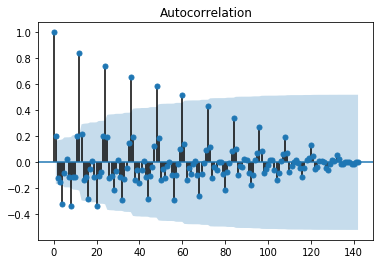

In [66]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# ACF plot of the Seasonal Difference.
fig_seasonal_acf = plot_acf(season_diff.dropna())

/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


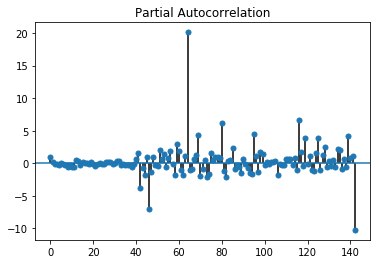

In [68]:
# PACF plot of the Seasonal Difference.
fig_seasonal_pacf = plot_pacf(season_diff.dropna())

In [69]:
import statsmodels.tsa.statespace.sarimax as smt

In [70]:
model = smt.SARIMAX(season_diff,order=(2,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  143
Model:             SARIMAX(2, 1, 0)x(1, 1, 1, 12)   Log Likelihood                 214.481
Date:                            Thu, 09 Jan 2020   AIC                           -418.961
Time:                                    19:58:53   BIC                           -404.624
Sample:                                02-01-1949   HQIC                          -413.135
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8909      0.082    -10.903      0.000      -1.051      -0.731
ar.L2         -0.3796      0.100   

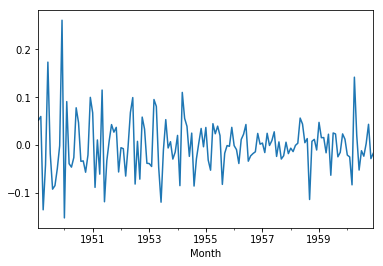

In [71]:
results.resid.plot()

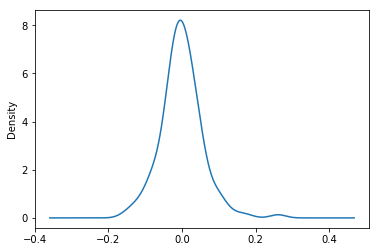

In [72]:
results.resid.plot(kind='kde')

In [73]:
forecast = results.predict(start = 120, end= 144, dynamic= True)  

/Users/dorothyjeyson/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [76]:
import warnings
import itertools
p=d=q=[0,1,2]
pdq=list(itertools.product(p,d,q))

In [80]:
PDQ = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [81]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in PDQ:
        
        try:
            temp_model = smt.SARIMAX(data_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(2, 1, 1)x(1, 0, 1, 12)12 model - AIC:-499.7613912724077


In [82]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1957-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred_dynamic_ci

,lower #Passengers,upper #Passengers
1957-01-01,5.686309,5.831825
1957-02-01,5.644624,5.822471
1957-03-01,5.774966,5.984178
1957-04-01,5.749160,5.990000
1957-05-01,5.744329,6.009941
1957-06-01,5.868207,6.160416
1957-07-01,5.970305,6.285517
1957-08-01,5.938002,6.276647
1957-09-01,5.809351,6.169815
1957-10-01,5.667638,6.049726


In [83]:
# Extract the predicted and true values of our time series
ts_forecasted = pred_dynamic.predicted_mean
ts_truth = data_log['1957-01-01':]

# Compute the mean square error
mse = ((ts_forecasted - ts_truth) ** 2).mean()
mape =np.abs(ts_forecasted - ts_truth).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The Mean Absolute percentage Error of our forecasts is {}'.format(round(mape, 4)))

The Mean Squared Error of our forecasts is 0.0123
The Mean Absolute percentage Error of our forecasts is 0.0948


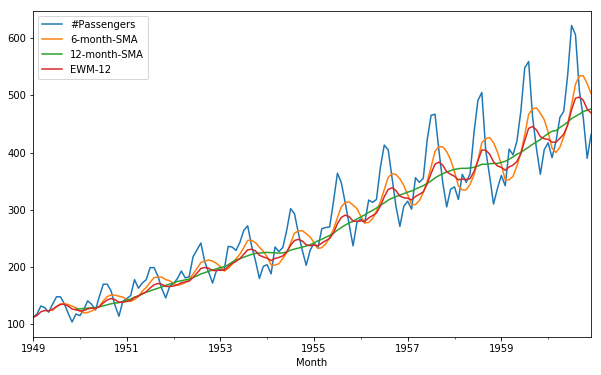

In [87]:
axis = data1['1949':].plot(label='Observed', figsize=(10, 6))
axis

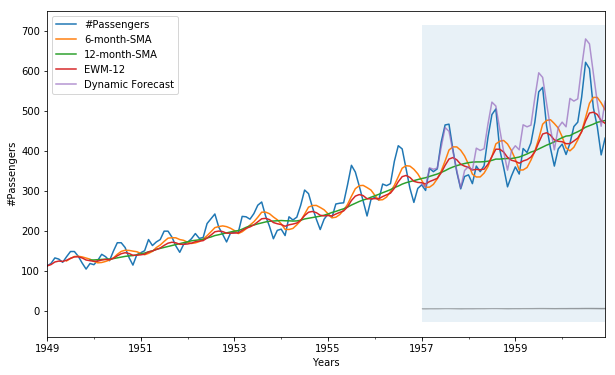

In [89]:
axis = data1['1949':].plot(label='Observed', figsize=(10, 6))
np.exp(pred_dynamic.predicted_mean).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
axis.fill_betweenx(axis.get_ylim(), pd.to_datetime('1957-01-01'), data1.index[-1], alpha=.1, zorder=-1)
axis.set_xlabel('Years')
axis.set_ylabel('#Passengers')
plt.legend(loc='best')
plt.show()
plt.close()

In [90]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [91]:
n_steps = 36
idx = pd.date_range(data1.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.exp(pred_uc_95.predicted_mean), np.exp(pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.exp(pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1960-12-01,450.676110,419.119252,484.608986,419.119252,484.608986
1961-01-01,425.438230,389.390720,464.822807,389.390720,464.822807
1961-02-01,483.248611,435.548517,536.172691,435.548517,536.172691
1961-03-01,491.584251,436.265957,553.916876,436.265957,553.916876
1961-04-01,509.331314,446.620927,580.846914,446.620927,580.846914


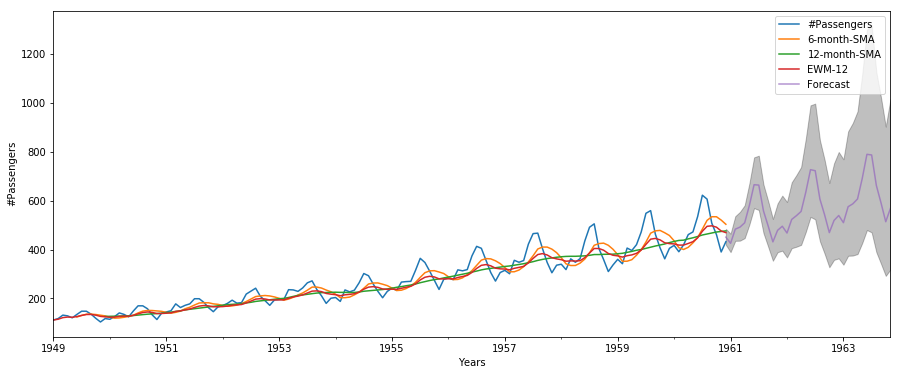

In [92]:
# plot the forecast along with the confidence band
axis = data1.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
#axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.75)
axis.set_xlabel('Years')
axis.set_ylabel('#Passengers')
plt.legend(loc='best')
plt.show()

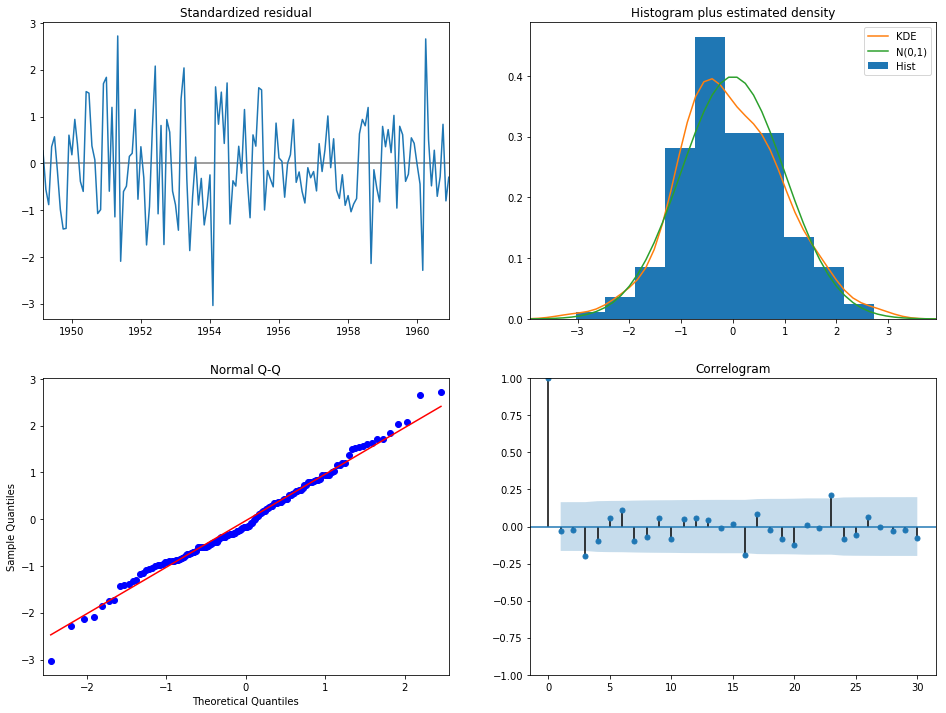

In [93]:
results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [139]:
import sys

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 1), q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))
    print(pdq)
    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    print(seasonal_pdq)
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    count=1
    count1=1

    for param in pdq:
        count1+=1
        for param_seasonal in seasonal_pdq:

            try:
    
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=True,
                                                 enforce_invertibility=True)
                temp_results = temp_model.fit()

                # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    print(best_aic)
                    best_pdq = param
                    print(best_pdq)
                    best_seasonal_pdq = param_seasonal
                    print(best_seasonal_pdq)
                    best_results = temp_results
            except:
                print("Unexpected error:", sys.exc_info()[0])
                continue
            count+=1
    print(count)
    print(count1)
                
                

    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [140]:
#ARIMA Model No Regressor
timeseries = data_log
#regressors = lagged_mkt_exp_diff_sales_data["Diff_Mkt_Exp"][3:47]
auto_arima(timeseries, p=range(0, 2), d=range(0, 2), q=range(0, 2))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'NameError'>
Unexpected error: <class 'Name

AttributeError: 'NoneType' object has no attribute 'summary'

In [129]:
p=range(0, 2)
d=range(0, 1) 
q=range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1)]

In [127]:
a=range(0,2)
list(a)

[0, 1]